In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# data loading by using keras
training_set = tf.keras.utils.image_dataset_from_directory(
    'new_train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10960 files belonging to 30 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [6]:
for x,y in training_set: # x-> pix.. value y-> label
    print (x , x.shape)
    print(y , y.shape)
    break

tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.    

In [7]:
# building model

from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , BatchNormalization , Dropout
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.optimizers.legacy import Adam
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu', input_shape=[128, 128 , 3])) # rectified linear unit
model.add(Conv2D(filters=32,kernel_size=3,padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2 , strides=2))

d:\MedicalPlant\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu', input_shape=[128, 128 , 3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2 , strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu', input_shape=[128, 128 , 3]))
model.add(Conv2D(filters=128,kernel_size=3,padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2 , strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu', input_shape=[128, 128 , 3]))
model.add(Conv2D(filters=256,kernel_size=3,padding='same' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2 , strides=2))

In [13]:
# flattenig operation
model.add(Flatten())

In [14]:
model.add(Dense(units=1024,activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
# output layer
model.add(Dense(units=30 , activation='softmax'))

In [17]:
# compiling model 
model.compile(optimizer='Adam' , loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from keras.callbacks import  EarlyStopping
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,983,166 (68.60 MB)

 Trainable params: 17,982,206 (68.60 MB)

 Non-trainable params: 960 (3.75 KB)

In [19]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


In [20]:
# model training
training_model=model.fit(x=training_set,validation_data=validation_set,epochs=50 , callbacks=callback)

Epoch 1/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.2218 - loss: 5.4383 - val_accuracy: 0.0353 - val_loss: 29.1685
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.4313 - loss: 1.8900 - val_accuracy: 0.5210 - val_loss: 1.6913
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.5478 - loss: 1.4603 - val_accuracy: 0.6042 - val_loss: 1.4175
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.6404 - loss: 1.1233 - val_accuracy: 0.4182 - val_loss: 2.8205
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.7132 - loss: 0.9241 - val_accuracy: 0.7099 - val_loss: 0.9195
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 523s 2s/step - accuracy: 0.7828 - loss: 0.7022 - val_accuracy: 0.6962 - val_loss: 1.1009
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.8305 - loss: 0.5443 - val_accuracy: 0.7326 - val_loss: 1.0342
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 524s 2s/step - accuracy: 0.8577 - loss: 0.4391 - val_acc

In [21]:
# model evaluation on training set

training_loss , train_accuracy = model.evaluate(training_set)

343/343 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.8062 - loss: 0.9051


In [22]:
# model evaluation on training set

validation_loss , validation_accuracy = model.evaluate(validation_set)

116/116 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - accuracy: 0.6607 - loss: 1.8434


In [23]:
tf.keras.callbacks.History()

In [24]:
training_model.history

{'accuracy': [0.2972627878189087,
  0.4616788327693939,
  0.5699817538261414,
  0.6604927182197571,
  0.7406934499740601,
  0.7928832173347473,
  0.834854006767273,
  0.8612226247787476,
  0.877098560333252,
  0.9007299542427063,
  0.9052919745445251,
  0.911952555179596,
  0.923448920249939,
  0.9282846450805664,
  0.9400547742843628,
  0.938503623008728,
  0.936952531337738,
  0.953102171421051,
  0.9585766196250916,
  0.9550182223320007,
  0.963594913482666,
  0.9636861085891724,
  0.9719890356063843,
  0.9615876078605652],
 'loss': [3.1909775733947754,
  1.7789051532745361,
  1.3822933435440063,
  1.0820543766021729,
  0.8364662528038025,
  0.67391437292099,
  0.5310227274894714,
  0.43077242374420166,
  0.3933615982532501,
  0.3217378854751587,
  0.29837632179260254,
  0.2898561656475067,
  0.2543247938156128,
  0.23088815808296204,
  0.19683879613876343,
  0.21179671585559845,
  0.23043499886989594,
  0.15903791785240173,
  0.14089365303516388,
  0.15878841280937195,
  0.12905351

In [27]:
# viz

epochs = [i for i in range(1,25)]
epochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

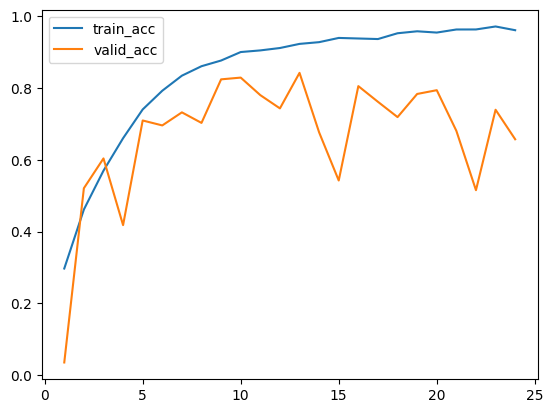

In [28]:
plt.plot(epochs,training_model.history['accuracy'] , label = 'train_acc')
plt.plot(epochs,training_model.history['val_accuracy'] , label='valid_acc')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names
class_name

['Arive-Dantu',
 'Basale',
 'Betel',
 'Crape_Jasmine',
 'Curry',
 'Drumstick',
 'Fenugreek',
 'Guava',
 'Hibiscus',
 'Indian_Beech',
 'Indian_Mustard',
 'Jackfruit',
 'Jamaica_Cherry-Gasagase',
 'Jamun',
 'Jasmine',
 'Karanda',
 'Lemon',
 'Mango',
 'Mexican_Mint',
 'Mint',
 'Neem',
 'Oleander',
 'Parijata',
 'Peepal',
 'Pomegranate',
 'Rasna',
 'Rose_apple',
 'Roxburgh_fig',
 'Sandalwood',
 'Tulsi']

In [32]:
test_set =tf.keras.utils.image_dataset_from_directory(
    'new_validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,# one by one check all the directory
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3706 files belonging to 30 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred

116/116 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step


array([[7.5581998e-02, 1.7179906e-03, 9.6510434e-05, ..., 5.2175159e-07,
        2.7054797e-05, 8.7496955e-03],
       [8.8647729e-01, 1.1407495e-03, 1.3950474e-04, ..., 2.1325586e-05,
        2.8427703e-05, 3.4075786e-04],
       [7.2379178e-01, 1.6553937e-02, 5.3597637e-03, ..., 1.2763658e-04,
        1.7619212e-05, 3.4928988e-03],
       ...,
       [9.9966788e-01, 1.2013452e-13, 3.3020303e-08, ..., 7.9877655e-15,
        6.3031530e-13, 2.7192063e-06],
       [9.9956316e-01, 1.3864711e-10, 2.7712002e-07, ..., 5.6484140e-11,
        1.0037104e-12, 1.7821571e-04],
       [9.9996471e-01, 4.3651357e-11, 6.4142853e-07, ..., 2.0917958e-11,
        1.4392211e-12, 4.6106143e-06]], dtype=float32)

In [34]:
predicted_categories= tf.argmax(y_pred,axis=1)

In [35]:
true_categories = tf.concat([y for x,y in test_set] , axis=0)
true_categories #one hot encodding

<tf.Tensor: shape=(3706, 30), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
y_true= tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(3706,), dtype=int64, numpy=array([ 0,  0,  0, ..., 29, 29, 29], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_true,predicted_categories ,target_names = class_name))

                         precision    recall  f1-score   support

            Arive-Dantu       0.29      0.52      0.37       128
                 Basale       0.66      0.80      0.72       128
                  Betel       0.72      0.63      0.67       108
          Crape_Jasmine       0.28      0.91      0.43       128
                  Curry       0.44      0.66      0.53       128
              Drumstick       0.86      0.84      0.85       128
              Fenugreek       1.00      0.45      0.62       128
                  Guava       0.78      0.96      0.86       128
               Hibiscus       0.75      0.63      0.68       100
           Indian_Beech       0.70      0.83      0.76       128
         Indian_Mustard       0.59      0.96      0.73       128
              Jackfruit       0.72      0.95      0.82       128
Jamaica_Cherry-Gasagase       0.94      0.95      0.95       128
                  Jamun       0.77      0.73      0.75        90
                Jasmine 